# Activity 2.2: 4D-Var data assimilation window length

## 1. Introduction

In this activity, we will focus on the 4D-Var scheme. Recall that in this method we can compare the observations and states at multiple times throughout a time period, called an _assimilation window_, to determine the state at the initial time. This time, we ask the question, "What happens when the assimilation window length is changed?"

We will perform identical twin experiments as in the previous activity (2.1).

In [1]:
import numpy as np
from tools.common_misc import gen_obs, rmse_spread, createH, getBsimple
from tools.common_plots import plotRMSP

from tools.L63_model import lorenz63
from tools.L63_var import var4d
from tools.L63_plots import plotL63, plotL63obs, plotL63DA_var

## 2. Compute the Nature Run

We will use the Lorenz 63 dynamical model (see Activity 2.1 for more details). We will generate the true trajectories of `x[0]`, `x[1]` and `x[2]` up to `tmax=1`, as before. 

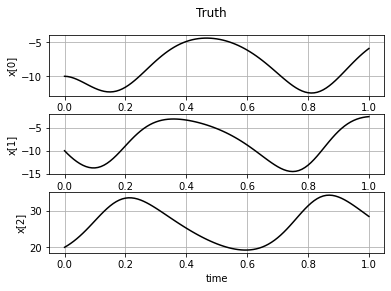

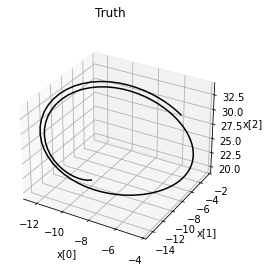

In [2]:
x0 = [-10, -10, 20]
t, xt = lorenz63(x0, tmax=1)
plotL63(t, xt, True)

## 3. Generate observations

As in the previous activity, we generate observations (red dots) of the model variables `x[0]`, `x[1]` and `x[2]` by adding noise to the true trajectories (black). The observations are produced at times `t=0.1, t=0.2, …, t=1`; thus giving ten observations of each model variable. 

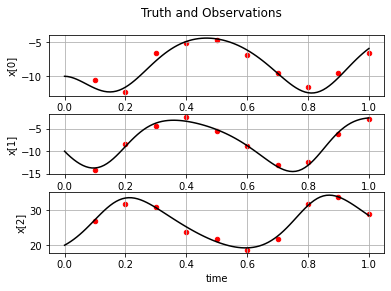

In [3]:
obsgrid = 'xyz' # This means that we will generate obs for all 3 variables
model='L63'
H, observed_vars = createH(obsgrid, model)

tobs, y, R = gen_obs(t, xt, period_obs=10, H=H, var_obs=0.5, seed=1)
plotL63obs(t, xt, tobs, y, observed_vars)

We now create a simple background error covariance matrix.

In [4]:
Nx = np.size(x0)
Bpre, Bcorr = getBsimple(model,Nx)
tune = 1 # depends on the observational frequency
B = tune * Bpre

## 4. Data assimilation using 4D-Var

We will now perform data assimilation using the 4D-Var method. An assimilation is performed at every analysis window, that is we can choose how many observations of each variable to include into the assimilation by setting `anawin` to the required number of observations. We generate the background for every assimilation (blue). The analysis is shown in magenta. 

Run 4D-Var assimilations changing `anawin’ values (for example, 1, 2, 5, 10). How does the length of the assimilation window affect the 4D-Var analysis? How similar are the background and analysis trajectories and their root mean squared error?

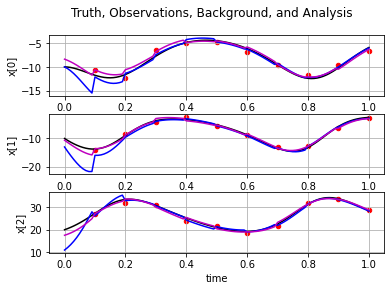

In [5]:
anawin = 1
xtol = 1e-6
x0guess = [-11, -12, 10]
xb, xa = var4d(x0guess, t, tobs, anawin, y, H, B, R, model, Nx, xtol)
plotL63DA_var(t, xt, tobs, y, observed_vars, xb, xa)

_Recap:_ The root mean square error is used to evaluate the differences between the true trajectory of the three variables and the analysis, and the true trajectory and the background at every time step. A small root mean square error shows good agreement between the compared trajectories. 

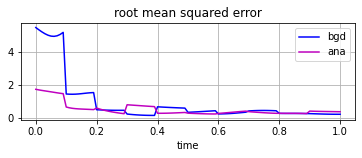

In [6]:
rmseb = rmse_spread(xt, xb, None, 1)
rmsea = rmse_spread(xt, xa, None, 1)
plotRMSP(t, rmseb, rmsea)

# show the average rmse for observation window length

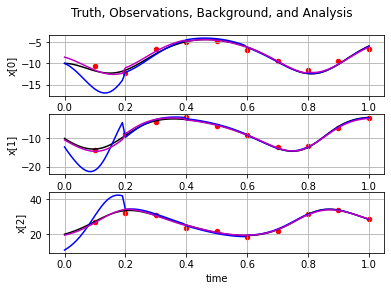

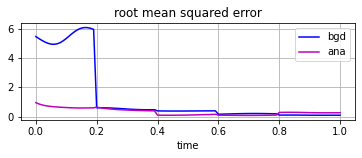

In [7]:
anawin=2
xb,xa = var4d(x0guess,t,tobs,anawin,y,H,B,R,model,Nx,xtol)
plotL63DA_var(t,xt,tobs,y,observed_vars,xb,xa)

rmseb = rmse_spread(xt,xb,None,1)
rmsea = rmse_spread(xt,xa,None,1)
plotRMSP(t,rmseb,rmsea)

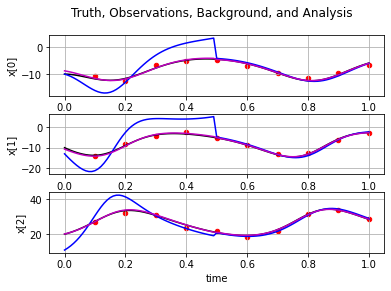

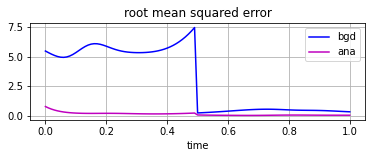

In [8]:
anawin=5
xb,xa = var4d(x0guess,t,tobs,anawin,y,H,B,R,model,Nx,xtol)
plotL63DA_var(t,xt,tobs,y,observed_vars,xb,xa)

rmseb = rmse_spread(xt,xb,None,1)
rmsea = rmse_spread(xt,xa,None,1)
plotRMSP(t,rmseb,rmsea)

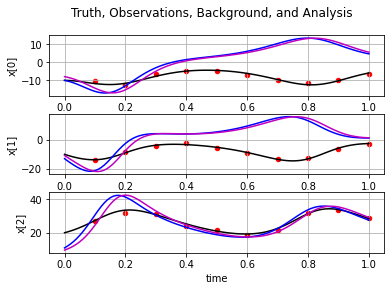

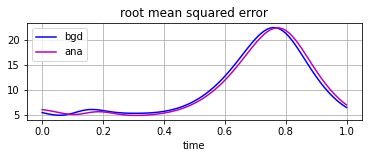

In [9]:
anawin=10
xb,xa = var4d(x0guess,t,tobs,anawin,y,H,B,R,model,Nx,xtol)
plotL63DA_var(t,xt,tobs,y,observed_vars,xb,xa)

rmseb = rmse_spread(xt,xb,None,1)
rmsea = rmse_spread(xt,xa,None,1)
plotRMSP(t,rmseb,rmsea)

## 5. Conclusions

We experimented with changing the assimilation window length when using the 4D-Var data assimilation scheme. Different analyses can be obtained for different assimilation window lengths when the same observations are considered: a too short or too long assimilation window is detrimental to the analysis as seen by the root mean square error, because there may be very few observations or the linearised model, which is used in the iterative approach, describes the system dynamics over long time poorly. It is thus important to find the optimal assimilation window length.

## Acknowledgements

This code has been created by  authors from the [Data Assimilation Research Centre](https://research.reading.ac.uk/met-darc/) (DARC) at the [University of Reading](https://www.reading.ac.uk), funded in part by the [Data Assimilation for the REsilient City](https://research.reading.ac.uk/dare/) (DARE) project (EPSRC EP/P002331/1) and the NERC [National Centre for Earth Observation](https://www.nceo.ac.uk) (NCEO).